![Gesund](https://egirisim.com/wp-content/uploads/2023/08/gesund-ai-1068x580.jpg)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gesund-ai/gesund/blob/main/gesund/examples/classification_covidnet.ipynb)

# Classification on CovidNet 

This notebook provides and example of Gesund Validation with Classification

The notebook could be outlined as follows

- [Introduction](#intro)
- [Data Source](#data_source)
- [Basic Usage](#usage)
- [Explore Results](#results)

## <a id='intro'>Introduction</a>


To learn more about Gesundai Validation tool, Please visit the link <a href="https://gesund-ai.github.io/#gesund-ai">here</a>.

Please ensure you have installed the as per the installation instructions <a href="https://gesund-ai.github.io/user_guide.html#installation">here</a>.




## <a id='data_source'>Data Source</a>

### Dataset Name: [TCIA-MIDRC-RIC-1C](https://app.gesund.ai/data/dataset-details/Dataset3/overview)

To download the required JSON files, run the following commands in a Jupyter notebook cell


In [42]:
# Classification Annotation Data
!wget https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/tests/_data/classification/gesund_custom_format/annotation.json

# Classification Prediction Data
!wget https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/tests/_data/classification/gesund_custom_format/prediction.json

# Classification Mappings
!wget https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/tests/_data/classification/test_class_mappings.json

--2024-12-23 07:23:29--  https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/tests/_data/classification/gesund_custom_format/annotation.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5891 (5.8K) [text/plain]
Saving to: ‘annotation.json.2’

annotation.json.2   100%[===================>]   5.75K  --.-KB/s    in 0s      

2024-12-23 07:23:29 (27.5 MB/s) - ‘annotation.json.2’ saved [5891/5891]

--2024-12-23 07:23:30--  https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/tests/_data/classification/gesund_custom_format/prediction.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199

## <a id='usage'> Basic Usage </a>

It is couple of simple lines of code to run `classification validation` on your data. 

In [43]:
from gesund import Validation
from gesund.validation._result import ValidationResult
from gesund.core._managers.metric_manager import metric_manager
from gesund.core._managers.plot_manager import plot_manager


In [44]:
import warnings
warnings.filterwarnings("ignore")


def plot_config(problem_type):
    plot_configs = {
        "classification": {
            "class_distributions": {
                "metrics": ["normal", "pneumonia"],
                "threshold": 10,
            },
            "blind_spot": {"class_type": ["Average", "1", "0"]},
            "performance_by_threshold": {
                "graph_type": "graph_1",
                "metrics": [
                    "F1",
                    "Sensitivity",
                    "Specificity",
                    "Precision",
                    "FPR",
                    "FNR",
                ],
                "threshold": 0.2,
            },
            "roc": {"roc_class": ["normal", "pneumonia"]},
            "precision_recall": {"pr_class": ["normal", "pneumonia"]},
            "confidence_histogram": {"metrics": ["TP", "FP"], "threshold": 0.5},
            "overall_metrics": {"metrics": ["AUC", "Precision"], "threshold": 0.2},
            "confusion_matrix": {},
            "prediction_dataset_distribution": {},
            "most_confused_bar": {},
            "confidence_histogram_scatter_distribution": {},
            "lift_chart": {},
        },
        "object_detection": {
            "mixed_plot": {"mixed_plot": ["map10", "map50", "map75"], "threshold": 0.5},
            "top_misses": {"min_miou": 0.70, "top_n": 10},
            "confidence_histogram": {"confidence_histogram_labels": ["TP", "FP"]},
            "classbased_table": {
                "classbased_table_metrics": ["precision", "recall", "f1"],
                "threshold": 0.2,
            },
            "overall_metrics": {
                "overall_metrics_metrics": ["map", "mar"],
                "threshold": 0.5,
            },
            "blind_spot": {
                "blind_spot_Average": ["mAP@50", "mAP@10", "mAR@max=10", "mAR@max=100"],
                "threshold": 0.5,
            },
        },
        "semantic_segmentation": {
            "violin_graph": {"metrics": ["Acc", "Spec", "AUC"], "threshold": 0.5},
            "plot_by_meta_data": {
                "meta_data_args": [
                    "FalsePositive",
                    "Dice Score",
                    "mean Sensitivity",
                    "mean AUC",
                    "Precision",
                    "AverageHausdorffDistance",
                    "SimpleHausdorffDistance",
                ]
            },
            "overall_metrics": {
                "overall_args": ["mean AUC", "fwIoU", "mean Sensitivity"]
            },
            "classbased_table": {"classbased_table_args": 0.5},
            "blind_spot": {
                "blind_spot_args": [
                    "fwIoU",
                    "mean IoU",
                    "mean Sensitivity",
                    "mean Specificity",
                    "mean Kappa",
                    "mean AUC",
                    "",
                ]
            },
        },
    }
    return plot_configs[problem_type]

In [45]:
metric_name = "lift_chart"
cohort_id = None
problem_type = "classification"
data_dir = f"./tests/_data/{problem_type}"


validator = Validation(
    annotations_path=f"{data_dir}/gesund_custom_format/annotation.json",
    predictions_path=f"{data_dir}/gesund_custom_format/prediction.json",
    class_mapping=f"{data_dir}/test_class_mappings.json",
    problem_type=problem_type,
    data_format="json",
    json_structure_type="gesund",
    plot_config=plot_config(problem_type),
    cohort_args={"selection_criteria": "random"},
    metric_args={"threshold": [0.25, 0.5, 0.75]},
)

validation_results = validator.run()

annotations path validated !
predictions path validated !
class mapping file validated !
Problem Type validated !
JSON structure type validated!
Data format validated!
No metadata path provided.
Running  classification.auc .....
Running  classification.confusion_matrix .....
Running  classification.lift_chart .....
Running  classification.most_confused .....
Running  classification.stats_tables .....
Running  classification.top_losses .....
Running  classification.threshold .....


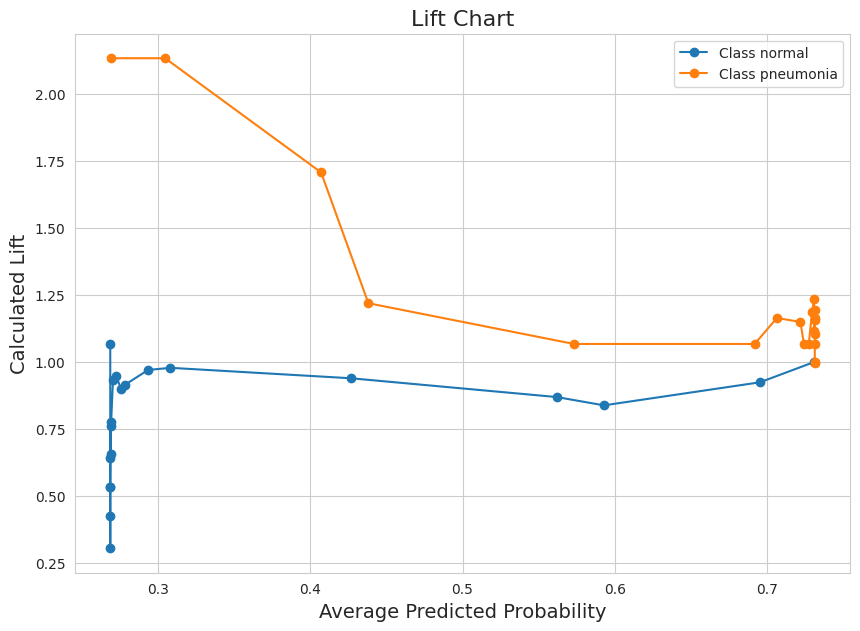

In [46]:
validation_results.plot(metric_name=metric_name, save_plot=False, cohort_id=cohort_id)

In [47]:
validation_results.save(metric_name)

In [48]:
validation_results.__dict__.keys()

dict_keys(['data', 'user_params', 'result', 'cohort_args', 'plot_args'])

#### Class instance attributes

<hr />

1. `data`: A pydantic model following the *UserInputData* that contains all the loaded user data.

2. `user_params`: A pydantic model following the schema *UserInputParams* that contains all the parameters provided.

3. `result`: Stores all computed outputs.

4. `cohort_args`: Defines how subsets of data are chosen for processing.

5. `plot_args`: Holds parameters for customizing the generated plots.


<hr />

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


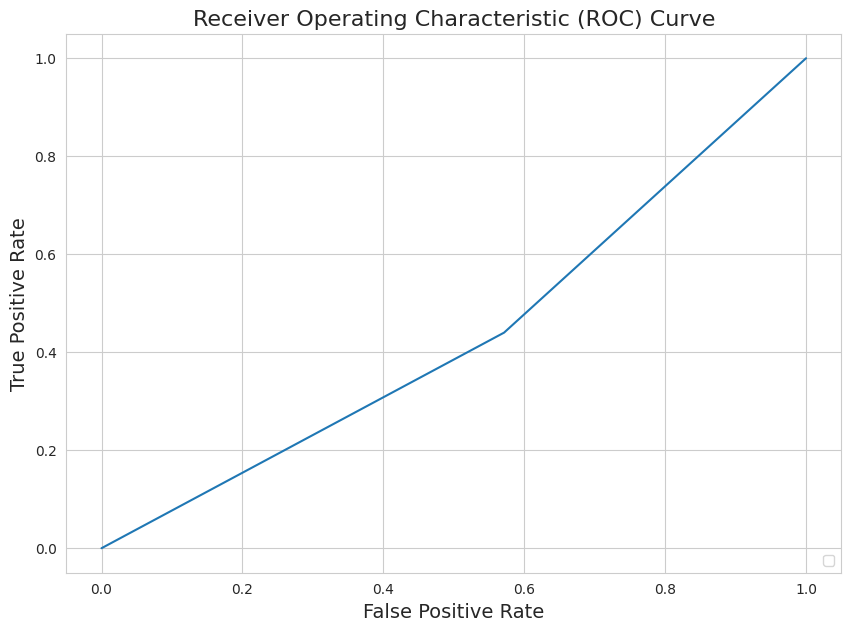

In [55]:
validation_results.plot(metric_name='auc', save_plot=False, cohort_id=cohort_id)

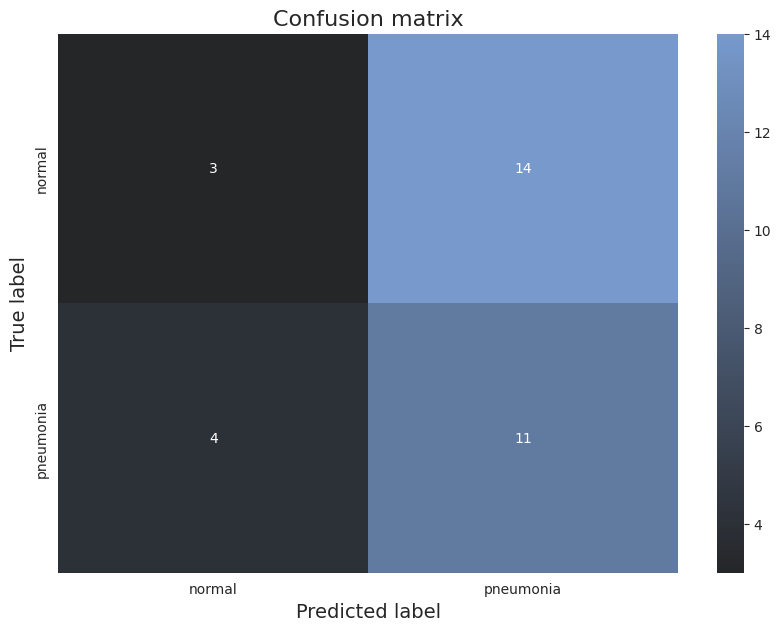

In [50]:
validation_results.plot(metric_name='confusion_matrix', save_plot=False, cohort_id=cohort_id)

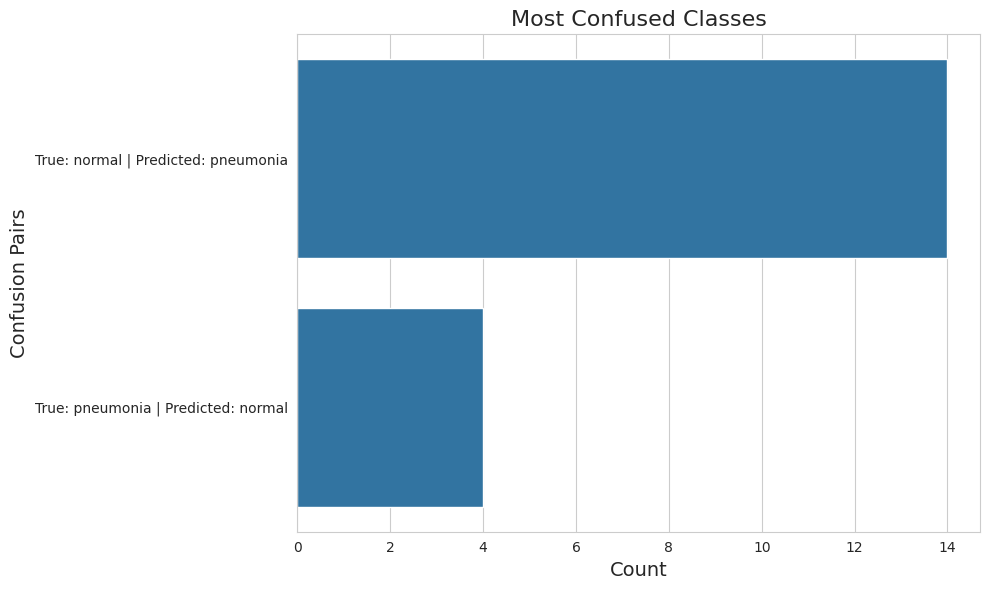

In [51]:
validation_results.plot(metric_name='most_confused', save_plot=False, cohort_id=cohort_id)

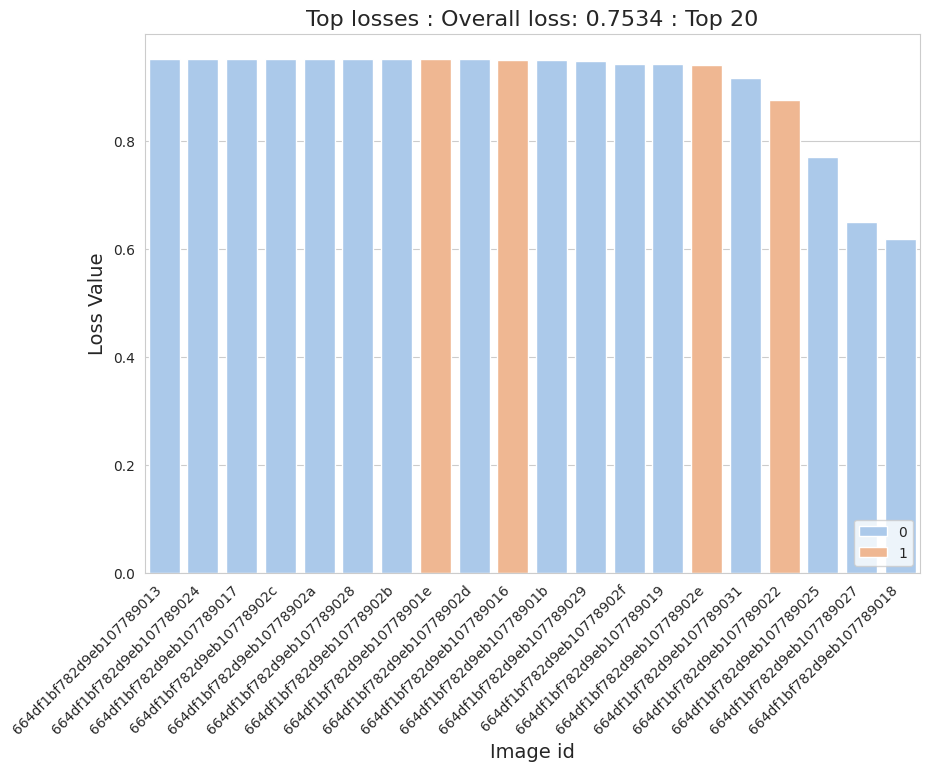

In [52]:
validation_results.plot(metric_name='top_losses', save_plot=False, cohort_id=cohort_id)

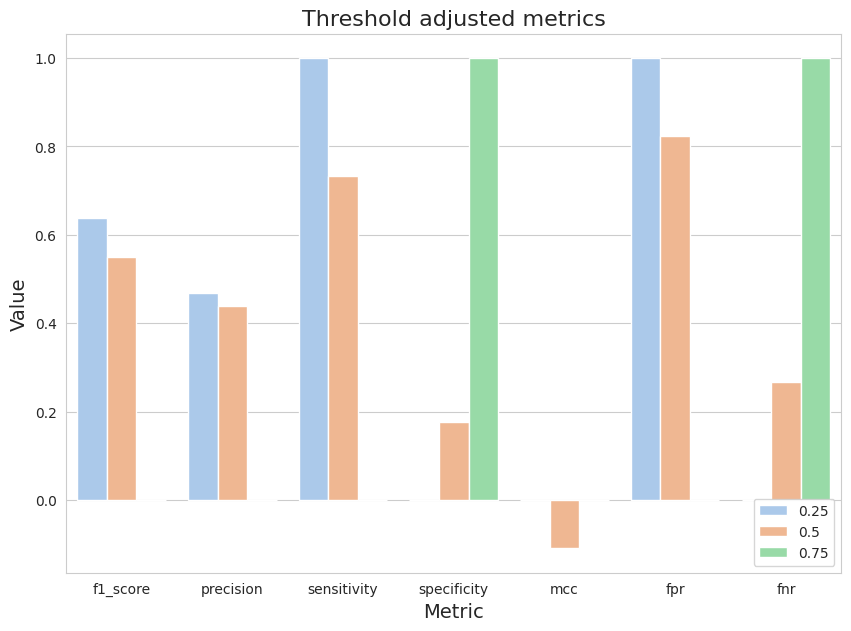

In [53]:
validation_results.plot(metric_name='threshold', save_plot=False, cohort_id=cohort_id)